<a href="https://colab.research.google.com/github/oxBinaryBrain/ShadowFox/blob/main/Shadowfox_Beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Housing Prices(Beginner)


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64
Mean Squared Error: 26.16
R-squared Score: 0.64


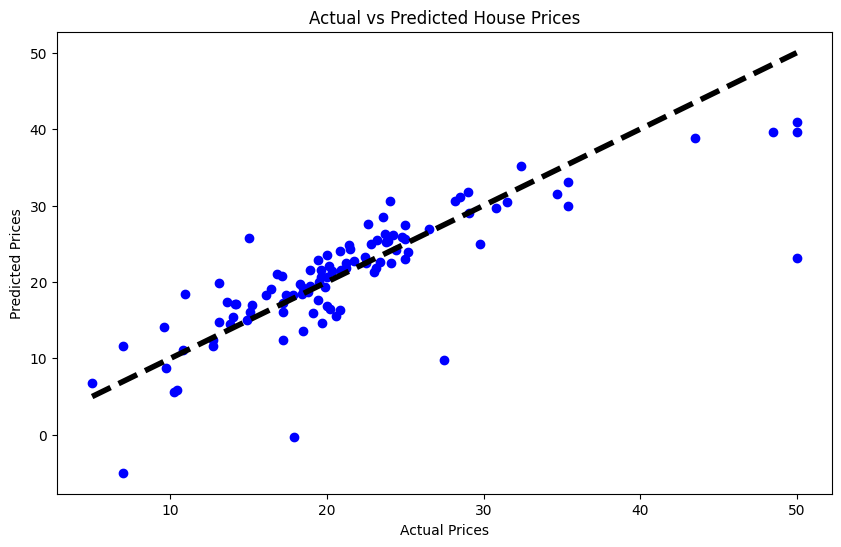

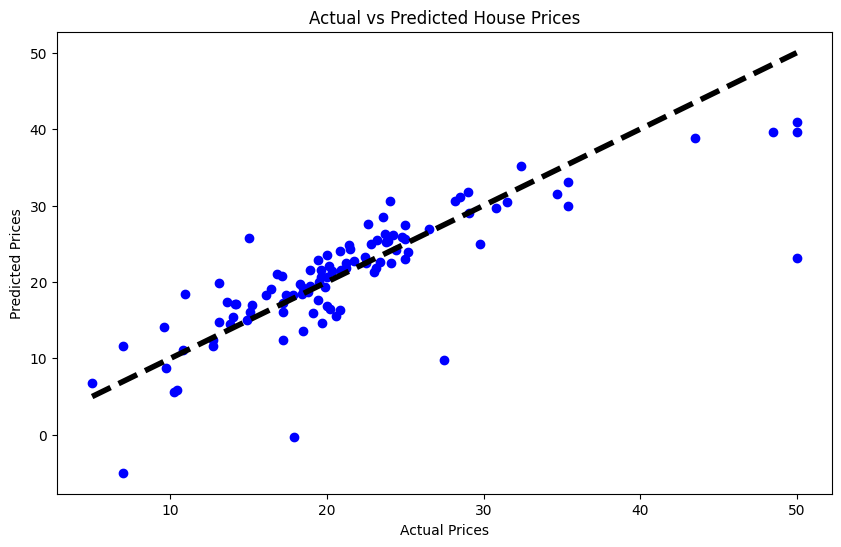

Predicted House Price: $-297058.58


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [2]:
 import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib


# Load the dataset
data = pd.read_csv('/content/HousingData.csv')

# Display the first few rows of the dataset
print(data.head())


# Check for missing values
print(data.isnull().sum())

# Fill missing values if necessary (example: fill with mean)
data.fillna(data.mean(), inplace=True)

# Select features and target variable
X = data.drop('MEDV', axis=1)  # Assuming 'MEDV' is the target variable
y = data['MEDV']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Initialize the model
model = Lasso(alpha=0.1)

# Train the model
model.fit(X_train, y_train)


# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Save the model before loading it
joblib.dump(model, 'boston_house_price_model.pkl')  # Save the trained model

# Load the model
loaded_model = joblib.load('boston_house_price_model.pkl')

# Example prediction
sample_data = np.array([[0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 2.0, 1.0, 396.9, 4.98, 24.0]])  # Example input
sample_data_scaled = scaler.transform(sample_data)
prediction = loaded_model.predict(sample_data_scaled)
print(f'Predicted House Price: ${prediction[0] * 1000:.2f}')